In [2]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Question 2

In [3]:
# image path
image_path = 'images/chestXray-dark.tif'

# read image
img = cv.imread(image_path)

# Check if the image was successfully loaded
if img is None:
    print("Error: Could not load image.")
else:
    print("Image loaded successfully.")

Image loaded successfully.


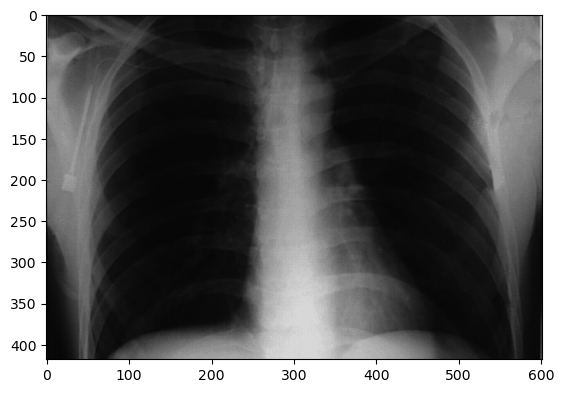

In [4]:
# Display the image

# Convert the image from BGR to RGB color space
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
# Display the image using matplotlib
plt.imshow(img_rgb)
# plt.axis('off')  # Hide the axis
plt.show()

In [92]:
def enhance_image(img):
    # histogram equalization
    equalized = cv.equalizeHist(img)

    ## gamma correction
    # gamma = 1.2
    # gamma_corrected = np.power(equalized / 255.0, gamma) * 255.0
    # gamma_corrected = gamma_corrected.astype(np.uint8)

    ## Enhance whites
    # bright_mask = (gamma_corrected > 180).astype(np.float32)
    # high_pass = gamma_corrected * 1.3 * bright_mask
    # high_pass = np.clip(high_pass, 0, 255).astype(np.uint8)

    # CLAHE
    clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    clahe_img = clahe.apply(equalized)

    # Unsharp Masking
    gaussian = cv.GaussianBlur(clahe_img, (9,9), 15)
    sharpened = cv.addWeighted(clahe_img, 1.5, gaussian, -0.5, 0)

    # Apply Laplacian Filter for Edge Enhancement
    laplacian = cv.Laplacian(sharpened, cv.CV_64F, ksize=3)
    laplacian = np.uint8(np.absolute(laplacian))

    # bilateral filter
    bilateral = cv.bilateralFilter(laplacian, d=9, sigmaColor=75, sigmaSpace=75)

    ## Laplacian enhancement
    # laplacian = cv.Laplacian(bilateral, cv.CV_64F)
    # threshold = 50
    # bright_mask = (bilateral > threshold).astype(np.float32)
    # enhanced = bilateral + (laplacian.astype(np.float32) * bright_mask)

    # normalization
    enhanced = cv.normalize(sharpened, None, 0, 255, cv.NORM_MINMAX)

    return enhanced.astype(np.uint8)


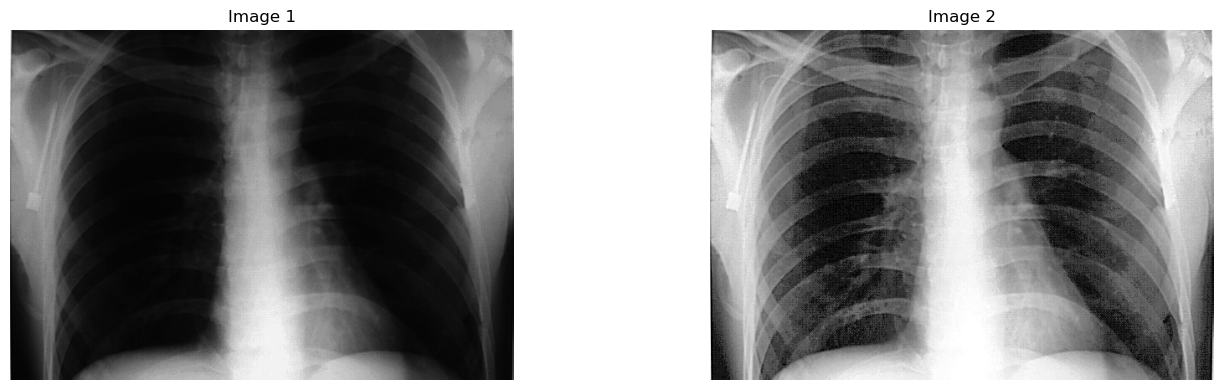

In [93]:
%reload_ext autoreload

enhanced_img = enhance_image(img_gray)

images = [img_gray, enhanced_img]

# Create figure with 2x5 grid
fig, axes = plt.subplots(1, 2, figsize=(15, 4))
axes = axes.ravel()

# Plot each image with title
for idx, (ax, img) in enumerate(zip(axes, images)):
    ax.imshow(img,cmap='gray')
    ax.set_title(f'Image {idx+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [58]:
print("Min:", np.min(enhanced_img), "Max:", np.max(enhanced_img))


Min: 0 Max: 255
